In [2]:
# Load Mushroom data
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('D:/Mushroom/mushroom.csv')
print(data)

     cap-shape cap-surface cap-color bruises%3F  odor gill-attachment  \
0         b'x'        b's'      b'n'       b't'  b'p'            b'f'   
1         b'x'        b's'      b'y'       b't'  b'a'            b'f'   
2         b'b'        b's'      b'w'       b't'  b'l'            b'f'   
3         b'x'        b'y'      b'w'       b't'  b'p'            b'f'   
4         b'x'        b's'      b'g'       b'f'  b'n'            b'f'   
...        ...         ...       ...        ...   ...             ...   
8119      b'k'        b's'      b'n'       b'f'  b'n'            b'a'   
8120      b'x'        b's'      b'n'       b'f'  b'n'            b'a'   
8121      b'f'        b's'      b'n'       b'f'  b'n'            b'a'   
8122      b'k'        b'y'      b'n'       b'f'  b'y'            b'f'   
8123      b'x'        b's'      b'n'       b'f'  b'n'            b'a'   

     gill-spacing gill-size gill-color stalk-shape  ...  \
0            b'c'      b'n'       b'k'        b'e'  ...   
1    

In [3]:
trait = data.columns

for j in range(0, len(trait)):
    data[trait[j]] = data[trait[j]].str.replace("'b","b")  #若為b'b'會一起刪掉
    data[trait[j]] = data[trait[j]].str.replace("b'","")
    data[trait[j]] = data[trait[j]].str.replace("'","")

print(data)

     cap-shape cap-surface cap-color bruises%3F odor gill-attachment  \
0            x           s         n          t    p               f   
1            x           s         y          t    a               f   
2            b           s         w          t    l               f   
3            x           y         w          t    p               f   
4            x           s         g          f    n               f   
...        ...         ...       ...        ...  ...             ...   
8119         k           s         n          f    n               a   
8120         x           s         n          f    n               a   
8121         f           s         n          f    n               a   
8122         k           y         n          f    y               f   
8123         x           s         n          f    n               a   

     gill-spacing gill-size gill-color stalk-shape  ...  \
0               c         n          k           e  ...   
1               c

In [4]:
data.to_csv(path_or_buf="D:/Mushroom/data.csv")

In [5]:
data.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [6]:
num = []
types = []
names = []

for j in range(0, len(trait)):
    colname = data.columns[j]
    count = data[colname].value_counts()
    name = count.index
    num.append(count)
    types.append(name)
    
print(types)

[Index(['x', 'f', 'k', 'b', 's', 'c'], dtype='object'), Index(['y', 's', 'f', 'g'], dtype='object'), Index(['n', 'g', 'e', 'y', 'w', 'b', 'p', 'c', 'u', 'r'], dtype='object'), Index(['f', 't'], dtype='object'), Index(['n', 'f', 'y', 's', 'a', 'l', 'p', 'c', 'm'], dtype='object'), Index(['f', 'a'], dtype='object'), Index(['c', 'w'], dtype='object'), Index(['b', 'n'], dtype='object'), Index(['b', 'p', 'w', 'n', 'g', 'h', 'u', 'k', 'e', 'y', 'o', 'r'], dtype='object'), Index(['t', 'e'], dtype='object'), Index(['b', '?', 'e', 'c', 'r'], dtype='object'), Index(['s', 'k', 'f', 'y'], dtype='object'), Index(['s', 'k', 'f', 'y'], dtype='object'), Index(['w', 'p', 'g', 'n', 'b', 'o', 'e', 'c', 'y'], dtype='object'), Index(['w', 'p', 'g', 'n', 'b', 'o', 'e', 'c', 'y'], dtype='object'), Index(['p'], dtype='object'), Index(['w', 'n', 'o', 'y'], dtype='object'), Index(['o', 't', 'n'], dtype='object'), Index(['p', 'e', 'l', 'f', 'n'], dtype='object'), Index(['w', 'n', 'k', 'h', 'r', 'u', 'o', 'y', 'b

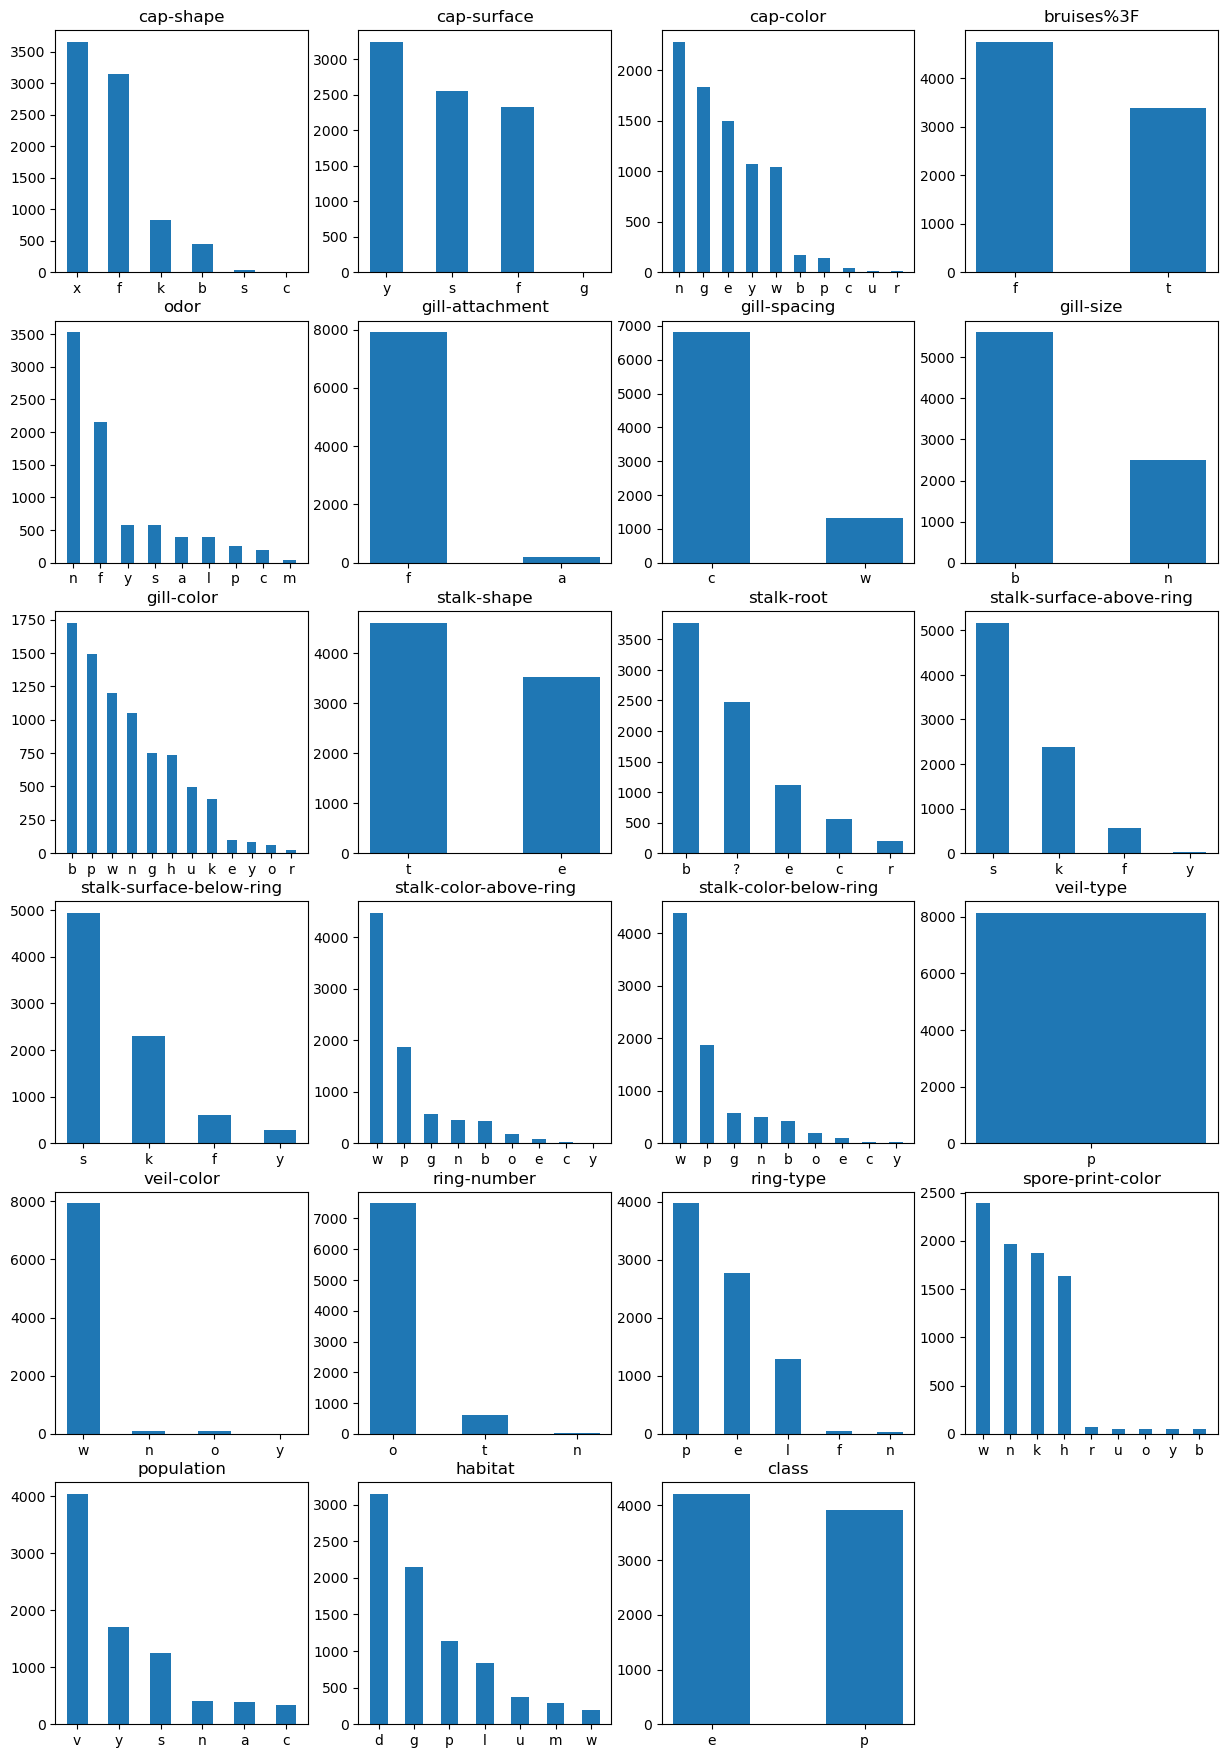

In [7]:
# Data Visualization
plt.figure(figsize=(15,22))

for i in range(0, len(num)):
    plt.subplot(6,4,i+1)
    plt.bar(types[i], num[i], width=0.5)
    plt.title(trait[i])
plt.savefig("D:/Mushroom/data visual.png")

In [8]:
#區分能否食用
good = data.loc[(data['class'] == "e")]
bad = data.loc[(data['class'] == "p")]

In [9]:
#Edible
num_g = []
types_g = []
names_g = []

for j in range(0, len(trait)):
    colname = good.columns[j]
    count_g = good[colname].value_counts()
    name_g = count_g.index
    num_g.append(count_g)
    types_g.append(name_g)
    
print(types_g)

[Index(['x', 'f', 'b', 'k', 's'], dtype='object'), Index(['f', 'y', 's'], dtype='object'), Index(['n', 'g', 'w', 'e', 'y', 'p', 'b', 'c', 'u', 'r'], dtype='object'), Index(['t', 'f'], dtype='object'), Index(['n', 'a', 'l'], dtype='object'), Index(['f', 'a'], dtype='object'), Index(['c', 'w'], dtype='object'), Index(['b', 'n'], dtype='object'), Index(['w', 'n', 'p', 'u', 'k', 'g', 'h', 'e', 'y', 'o'], dtype='object'), Index(['t', 'e'], dtype='object'), Index(['b', 'e', '?', 'c', 'r'], dtype='object'), Index(['s', 'f', 'k', 'y'], dtype='object'), Index(['s', 'f', 'y', 'k'], dtype='object'), Index(['w', 'g', 'p', 'o', 'e', 'n'], dtype='object'), Index(['w', 'p', 'g', 'o', 'e', 'n'], dtype='object'), Index(['p'], dtype='object'), Index(['w', 'n', 'o'], dtype='object'), Index(['o', 't'], dtype='object'), Index(['p', 'e', 'f'], dtype='object'), Index(['n', 'k', 'w', 'u', 'h', 'o', 'y', 'b'], dtype='object'), Index(['v', 'y', 's', 'n', 'a', 'c'], dtype='object'), Index(['d', 'g', 'm', 'l', 'w

In [10]:
#Poisonous
num_b = []
types_b = []
names_b = []

for j in range(0, len(trait)):
    colname = bad.columns[j]
    count_b = bad[colname].value_counts()
    name_b = count_b.index
    num_b.append(count_b)
    types_b.append(name_b)
    
print(types_b)

[Index(['x', 'f', 'k', 'b', 'c'], dtype='object'), Index(['y', 's', 'f', 'g'], dtype='object'), Index(['n', 'e', 'g', 'y', 'w', 'b', 'p', 'c'], dtype='object'), Index(['f', 't'], dtype='object'), Index(['f', 'y', 's', 'p', 'c', 'n', 'm'], dtype='object'), Index(['f', 'a'], dtype='object'), Index(['c', 'w'], dtype='object'), Index(['n', 'b'], dtype='object'), Index(['b', 'p', 'h', 'g', 'w', 'n', 'k', 'u', 'r', 'y'], dtype='object'), Index(['t', 'e'], dtype='object'), Index(['b', '?', 'e', 'c'], dtype='object'), Index(['k', 's', 'f', 'y'], dtype='object'), Index(['k', 's', 'f', 'y'], dtype='object'), Index(['w', 'p', 'n', 'b', 'c', 'y'], dtype='object'), Index(['w', 'p', 'n', 'b', 'c', 'y'], dtype='object'), Index(['p'], dtype='object'), Index(['w', 'y'], dtype='object'), Index(['o', 't', 'n'], dtype='object'), Index(['e', 'l', 'p', 'n'], dtype='object'), Index(['w', 'h', 'k', 'n', 'r'], dtype='object'), Index(['v', 'y', 's', 'c'], dtype='object'), Index(['d', 'p', 'g', 'l', 'u', 'm'], d

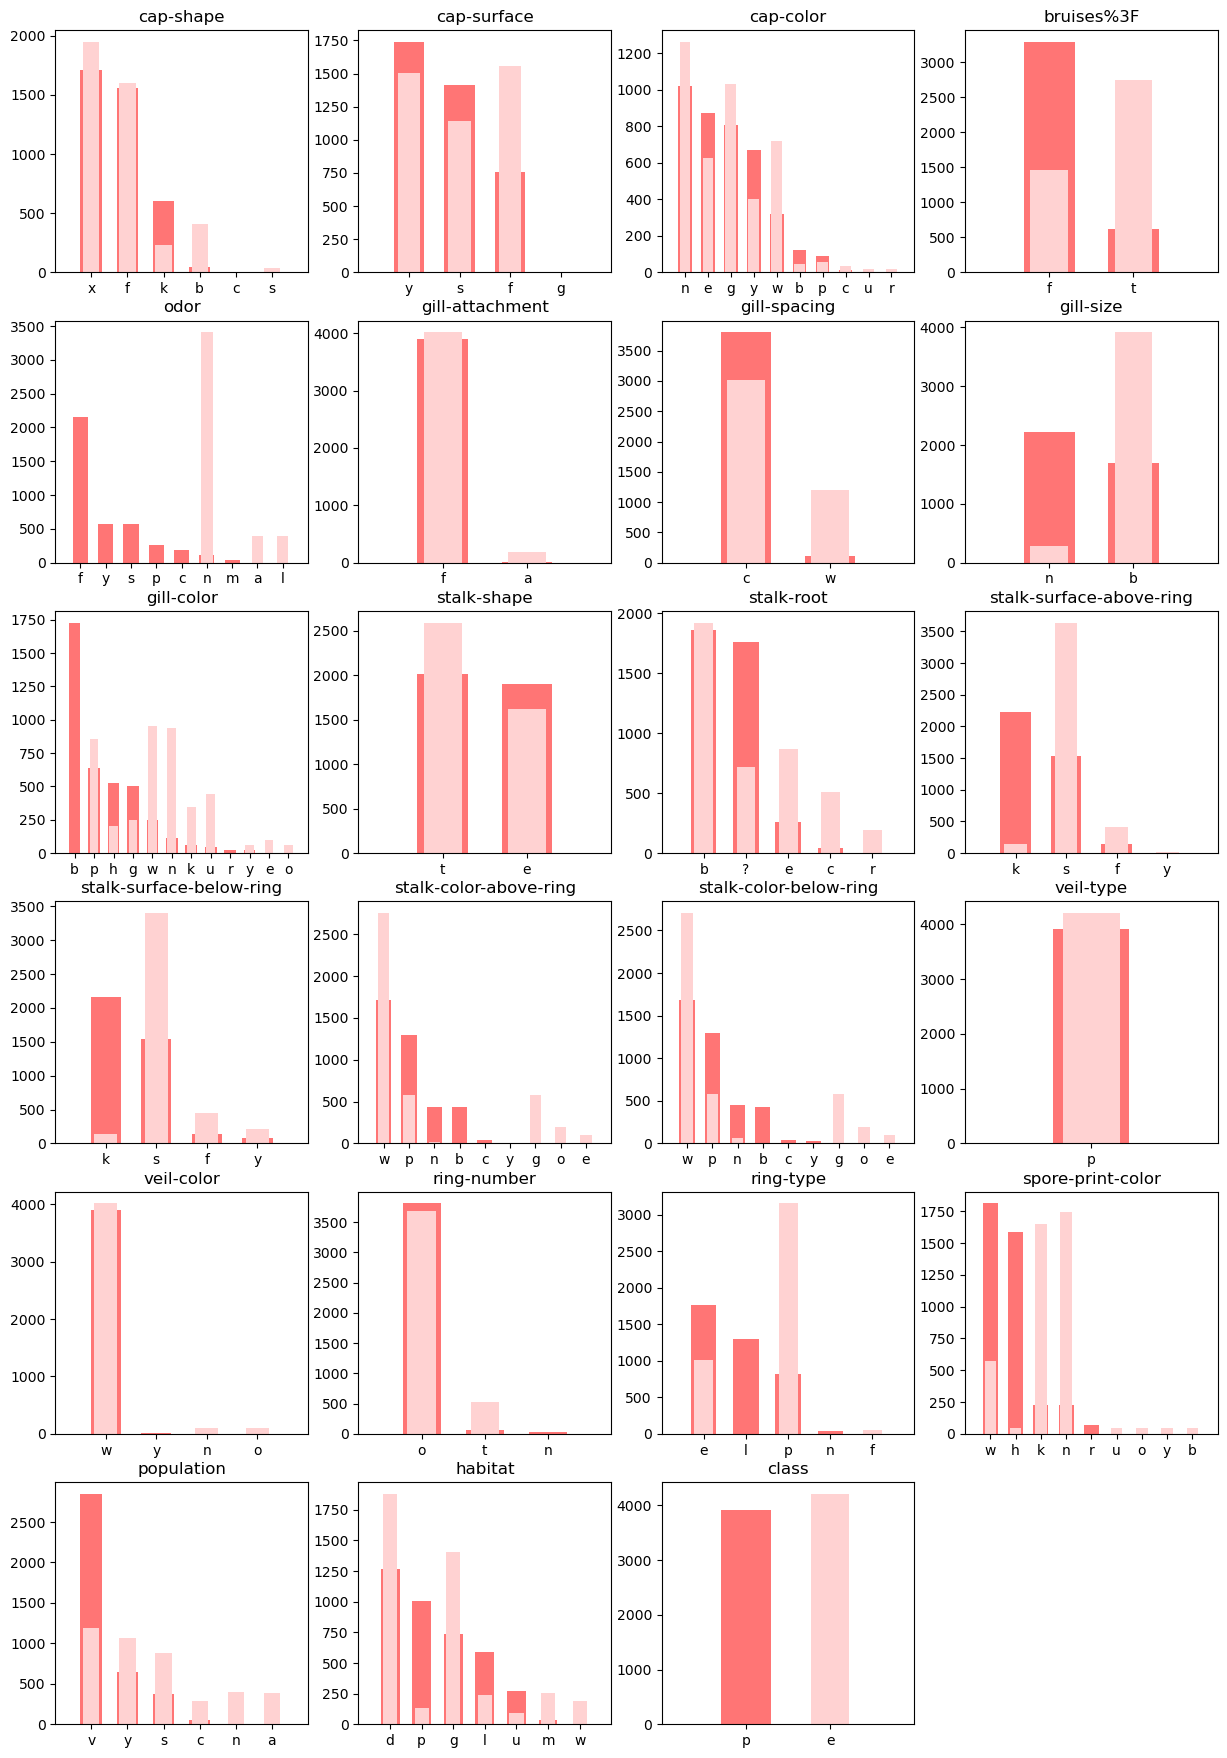

In [11]:
# Edible為淺色、Poisonous為深色 (照Poison排序)
plt.figure(figsize=(15,22))
for i, j in zip(range(len(num_g)), range(len(num_b))): 
    plt.subplot(6,4,i+1)
    plt.bar(types_b[j], num_b[j], color='#FF7575', label='poison', width = 0.6)  #Poison
    plt.bar(types_g[i], num_g[i], color='#FFD2D2', label='edible', width = 0.45) #Edible
    plt.title(trait[i])
    plt.xlim(-1,len(types[i]))
#plt.legend()
plt.savefig("D:/Mushroom/poisonous visual.png")

In [12]:
data["stalk-root"].value_counts()  #說明?

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [13]:
data["veil-type"].value_counts()   #單一變數可移除

p    8124
Name: veil-type, dtype: int64

In [14]:
#移除veil-type
new_data = data
new_data.drop("veil-type", axis=1, inplace=True)
print(new_data)

     cap-shape cap-surface cap-color bruises%3F odor gill-attachment  \
0            x           s         n          t    p               f   
1            x           s         y          t    a               f   
2            b           s         w          t    l               f   
3            x           y         w          t    p               f   
4            x           s         g          f    n               f   
...        ...         ...       ...        ...  ...             ...   
8119         k           s         n          f    n               a   
8120         x           s         n          f    n               a   
8121         f           s         n          f    n               a   
8122         k           y         n          f    y               f   
8123         x           s         n          f    n               a   

     gill-spacing gill-size gill-color stalk-shape  ...  \
0               c         n          k           e  ...   
1               c

In [34]:
#8124個samples隨機分為training(70%) / testing data(30%)
from sklearn.decomposition import KernelPCA as KPCA
from sklearn.model_selection import train_test_split

labels = new_data['class']
fea = new_data.drop(["class"], axis = 1)

#Output X: data, y: label
X_train,X_test,y_train,y_test = train_test_split(fea, labels, test_size=0.3, shuffle=True)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5686, 21)
(2438, 21)
(5686,)
(2438,)


In [36]:
X_train

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6972,k,s,n,f,y,f,c,n,b,t,...,s,s,w,w,w,o,e,w,v,l
6631,f,s,e,f,y,f,c,n,b,t,...,s,s,p,p,w,o,e,w,v,d
871,x,s,y,t,l,f,c,b,w,e,...,s,s,w,w,w,o,p,n,n,g
3497,f,f,e,t,n,f,c,b,u,t,...,s,s,g,g,w,o,p,k,y,d
4218,f,f,y,f,f,f,c,b,p,e,...,k,k,p,b,w,o,l,h,y,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5685,f,y,y,f,f,f,c,b,p,e,...,k,k,p,b,w,o,l,h,v,d
1734,f,s,n,t,p,f,c,n,n,e,...,s,s,w,w,w,o,p,k,v,g
2110,x,f,e,t,n,f,c,b,w,t,...,s,s,g,w,w,o,p,k,v,d
1934,x,f,n,f,n,f,w,b,k,t,...,f,s,w,w,w,o,e,n,s,g


In [37]:
y_test.values

array(['e', 'e', 'e', ..., 'e', 'p', 'p'], dtype=object)

In [38]:
#OneHotEncoder(將str轉成int)
from sklearn.preprocessing import OneHotEncoder

ec = OneHotEncoder()
all_hot = ec.fit_transform(new_data)
data_hot = ec.fit_transform(X_train)
test_hot = ec.fit_transform(X_test)
print(data_hot)

  (0, 3)	1.0
  (0, 8)	1.0
  (0, 14)	1.0
  (0, 20)	1.0
  (0, 30)	1.0
  (0, 32)	1.0
  (0, 33)	1.0
  (0, 36)	1.0
  (0, 37)	1.0
  (0, 50)	1.0
  (0, 51)	1.0
  (0, 58)	1.0
  (0, 62)	1.0
  (0, 71)	1.0
  (0, 80)	1.0
  (0, 84)	1.0
  (0, 87)	1.0
  (0, 89)	1.0
  (0, 101)	1.0
  (0, 107)	1.0
  (0, 111)	1.0
  (1, 2)	1.0
  (1, 8)	1.0
  (1, 12)	1.0
  (1, 20)	1.0
  :	:
  (5684, 89)	1.0
  (5684, 97)	1.0
  (5684, 106)	1.0
  (5684, 110)	1.0
  (5685, 2)	1.0
  (5685, 6)	1.0
  (5685, 19)	1.0
  (5685, 20)	1.0
  (5685, 24)	1.0
  (5685, 32)	1.0
  (5685, 33)	1.0
  (5685, 35)	1.0
  (5685, 40)	1.0
  (5685, 49)	1.0
  (5685, 52)	1.0
  (5685, 57)	1.0
  (5685, 61)	1.0
  (5685, 70)	1.0
  (5685, 73)	1.0
  (5685, 84)	1.0
  (5685, 87)	1.0
  (5685, 91)	1.0
  (5685, 95)	1.0
  (5685, 107)	1.0
  (5685, 109)	1.0


In [39]:
print(all_hot.shape)
#column數需要達到116
print(data_hot.shape)
print(test_hot.shape)

(8124, 118)
(5686, 116)
(2438, 116)


In [40]:
#Feature names
import warnings
warnings.filterwarnings("ignore")

encoded_all = ec.fit_transform(new_data)
all_feature_names = ec.get_feature_names_out()
#print(all_feature_names)

encoded_data = ec.fit_transform(fea)
feature_names = ec.get_feature_names_out()
print(feature_names)

['cap-shape_b' 'cap-shape_c' 'cap-shape_f' 'cap-shape_k' 'cap-shape_s'
 'cap-shape_x' 'cap-surface_f' 'cap-surface_g' 'cap-surface_s'
 'cap-surface_y' 'cap-color_b' 'cap-color_c' 'cap-color_e' 'cap-color_g'
 'cap-color_n' 'cap-color_p' 'cap-color_r' 'cap-color_u' 'cap-color_w'
 'cap-color_y' 'bruises%3F_f' 'bruises%3F_t' 'odor_a' 'odor_c' 'odor_f'
 'odor_l' 'odor_m' 'odor_n' 'odor_p' 'odor_s' 'odor_y' 'gill-attachment_a'
 'gill-attachment_f' 'gill-spacing_c' 'gill-spacing_w' 'gill-size_b'
 'gill-size_n' 'gill-color_b' 'gill-color_e' 'gill-color_g' 'gill-color_h'
 'gill-color_k' 'gill-color_n' 'gill-color_o' 'gill-color_p'
 'gill-color_r' 'gill-color_u' 'gill-color_w' 'gill-color_y'
 'stalk-shape_e' 'stalk-shape_t' 'stalk-root_?' 'stalk-root_b'
 'stalk-root_c' 'stalk-root_e' 'stalk-root_r' 'stalk-surface-above-ring_f'
 'stalk-surface-above-ring_k' 'stalk-surface-above-ring_s'
 'stalk-surface-above-ring_y' 'stalk-surface-below-ring_f'
 'stalk-surface-below-ring_k' 'stalk-surface-below-ri

In [41]:
#All dense matrix
import numpy as np
from scipy.sparse import csr_matrix

#print("Dense matrix representation: \n", all_hot)

# convert to sparse matrix representation 
S_all = csr_matrix(all_hot)
print("Sparse matrix: \n",S_all)

# convert back to 2-D representation of the matrix
B_all = S_all.todense()
print("Dense matrix: \n", B_all)

Sparse matrix: 
   (0, 5)	1.0
  (0, 8)	1.0
  (0, 14)	1.0
  (0, 21)	1.0
  (0, 28)	1.0
  (0, 32)	1.0
  (0, 33)	1.0
  (0, 36)	1.0
  (0, 41)	1.0
  (0, 49)	1.0
  (0, 54)	1.0
  (0, 58)	1.0
  (0, 62)	1.0
  (0, 71)	1.0
  (0, 80)	1.0
  (0, 84)	1.0
  (0, 87)	1.0
  (0, 93)	1.0
  (0, 96)	1.0
  (0, 106)	1.0
  (0, 114)	1.0
  (0, 117)	1.0
  (1, 5)	1.0
  (1, 8)	1.0
  (1, 19)	1.0
  :	:
  (8122, 107)	1.0
  (8122, 111)	1.0
  (8122, 117)	1.0
  (8123, 5)	1.0
  (8123, 8)	1.0
  (8123, 14)	1.0
  (8123, 20)	1.0
  (8123, 27)	1.0
  (8123, 31)	1.0
  (8123, 33)	1.0
  (8123, 35)	1.0
  (8123, 48)	1.0
  (8123, 49)	1.0
  (8123, 51)	1.0
  (8123, 58)	1.0
  (8123, 62)	1.0
  (8123, 69)	1.0
  (8123, 78)	1.0
  (8123, 83)	1.0
  (8123, 87)	1.0
  (8123, 93)	1.0
  (8123, 98)	1.0
  (8123, 104)	1.0
  (8123, 111)	1.0
  (8123, 116)	1.0
Dense matrix: 
 [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [42]:
print(B_all[0,:])

[[0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]]


In [43]:
all_set = pd.DataFrame()
for i in range(0,len(B_all)):
    # transforming the columns using One hot encoder
    Atemp_i = pd.DataFrame(B_all[i,:], columns= all_feature_names)
    all_set = pd.concat([all_set, Atemp_i], axis=0)
all_set

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class_e,class_p
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
#加index
all_set.index = new_data.index.values
all_set
#all_set.to_csv(path_or_buf="D:/Mushroom/all_set.csv")

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class_e,class_p
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8120,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8121,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
#Training dense matrix
# convert to sparse matrix representation 
S = csr_matrix(data_hot)
print("Sparse matrix: \n",S)

# convert back to 2-D representation of the matrix
B = S.todense()
print("Dense matrix: \n", B)

Sparse matrix: 
   (0, 3)	1.0
  (0, 8)	1.0
  (0, 14)	1.0
  (0, 20)	1.0
  (0, 30)	1.0
  (0, 32)	1.0
  (0, 33)	1.0
  (0, 36)	1.0
  (0, 37)	1.0
  (0, 50)	1.0
  (0, 51)	1.0
  (0, 58)	1.0
  (0, 62)	1.0
  (0, 71)	1.0
  (0, 80)	1.0
  (0, 84)	1.0
  (0, 87)	1.0
  (0, 89)	1.0
  (0, 101)	1.0
  (0, 107)	1.0
  (0, 111)	1.0
  (1, 2)	1.0
  (1, 8)	1.0
  (1, 12)	1.0
  (1, 20)	1.0
  :	:
  (5684, 89)	1.0
  (5684, 97)	1.0
  (5684, 106)	1.0
  (5684, 110)	1.0
  (5685, 2)	1.0
  (5685, 6)	1.0
  (5685, 19)	1.0
  (5685, 20)	1.0
  (5685, 24)	1.0
  (5685, 32)	1.0
  (5685, 33)	1.0
  (5685, 35)	1.0
  (5685, 40)	1.0
  (5685, 49)	1.0
  (5685, 52)	1.0
  (5685, 57)	1.0
  (5685, 61)	1.0
  (5685, 70)	1.0
  (5685, 73)	1.0
  (5685, 84)	1.0
  (5685, 87)	1.0
  (5685, 91)	1.0
  (5685, 95)	1.0
  (5685, 107)	1.0
  (5685, 109)	1.0
Dense matrix: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [46]:
train_set = pd.DataFrame()
for i in range(0,len(B)):
    # transforming the columns using One hot encoder
    Xtemp_i = pd.DataFrame(B[i,:], columns= feature_names)
    train_set = pd.concat([train_set, Xtemp_i], axis=0)

In [47]:
train_set

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [48]:
#加index
train_set.index = X_train.index.values
train_set
#train_set.to_csv(path_or_buf="D:/Mushroom/train_set.csv")

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
6972,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6631,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
871,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3497,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4218,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5685,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1734,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1934,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [49]:
#Testing dense matrix

# convert to sparse matrix representation 
S_test = csr_matrix(test_hot)
print("Sparse matrix: \n",S_test)

# convert back to 2-D representation of the matrix
B_test = S_test.todense()
print("Dense matrix: \n", B_test)

Sparse matrix: 
   (0, 5)	1.0
  (0, 8)	1.0
  (0, 13)	1.0
  (0, 20)	1.0
  (0, 27)	1.0
  (0, 32)	1.0
  (0, 34)	1.0
  (0, 35)	1.0
  (0, 42)	1.0
  (0, 50)	1.0
  (0, 54)	1.0
  (0, 58)	1.0
  (0, 62)	1.0
  (0, 71)	1.0
  (0, 80)	1.0
  (0, 84)	1.0
  (0, 87)	1.0
  (0, 89)	1.0
  (0, 96)	1.0
  (0, 106)	1.0
  (0, 110)	1.0
  (1, 5)	1.0
  (1, 6)	1.0
  (1, 14)	1.0
  (1, 21)	1.0
  :	:
  (2436, 89)	1.0
  (2436, 101)	1.0
  (2436, 107)	1.0
  (2436, 111)	1.0
  (2437, 3)	1.0
  (2437, 8)	1.0
  (2437, 14)	1.0
  (2437, 20)	1.0
  (2437, 30)	1.0
  (2437, 32)	1.0
  (2437, 33)	1.0
  (2437, 36)	1.0
  (2437, 37)	1.0
  (2437, 50)	1.0
  (2437, 51)	1.0
  (2437, 57)	1.0
  (2437, 61)	1.0
  (2437, 70)	1.0
  (2437, 80)	1.0
  (2437, 84)	1.0
  (2437, 87)	1.0
  (2437, 89)	1.0
  (2437, 101)	1.0
  (2437, 107)	1.0
  (2437, 111)	1.0
Dense matrix: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [50]:
test_set = pd.DataFrame()
for i in range(0,len(B_test)):
    # transforming the columns using One hot encoder
    Ytemp_i = pd.DataFrame(B_test[i,:], columns= feature_names)
    test_set = pd.concat([test_set, Ytemp_i], axis=0)
test_set

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [51]:
#加index
test_set.index = X_test.index.values
test_set
#test_set.to_csv(path_or_buf="D:/Mushroom/test_set.csv")

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
1156,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2207,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4107,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6077,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1645,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7729,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
736,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6208,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [70]:
#Poison Features
poisonous = all_set.loc[(all_set['class_p'] == 1)]
 
print(poisonous)

      cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0             0.0          0.0          0.0          0.0          0.0   
3             0.0          0.0          0.0          0.0          0.0   
8             0.0          0.0          0.0          0.0          0.0   
13            0.0          0.0          0.0          0.0          0.0   
17            0.0          0.0          0.0          0.0          0.0   
...           ...          ...          ...          ...          ...   
8114          0.0          0.0          1.0          0.0          0.0   
8116          0.0          0.0          0.0          1.0          0.0   
8117          0.0          0.0          0.0          1.0          0.0   
8118          0.0          0.0          0.0          1.0          0.0   
8122          0.0          0.0          0.0          1.0          0.0   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0             1.0            0.0          

In [71]:
poison = poisonous.drop(["class_p","class_e"], axis = 1)

In [72]:
poison_feature = poison.sum(axis=0)
poison_feature

cap-shape_b      48.0
cap-shape_c       4.0
cap-shape_f    1556.0
cap-shape_k     600.0
cap-shape_s       0.0
                ...  
habitat_l       592.0
habitat_m        36.0
habitat_p      1008.0
habitat_u       272.0
habitat_w         0.0
Length: 116, dtype: float64

In [73]:
num1 = []
names1 = []
new_types = []

for j in range(22):
    colname1 = new_data.columns[j]
    count1 = new_data[colname1].value_counts()
    name1 = count1.index
    num1.append(count1)
    new_types.append(name1)
    
print(new_types)

[Index(['x', 'f', 'k', 'b', 's', 'c'], dtype='object'), Index(['y', 's', 'f', 'g'], dtype='object'), Index(['n', 'g', 'e', 'y', 'w', 'b', 'p', 'c', 'u', 'r'], dtype='object'), Index(['f', 't'], dtype='object'), Index(['n', 'f', 'y', 's', 'a', 'l', 'p', 'c', 'm'], dtype='object'), Index(['f', 'a'], dtype='object'), Index(['c', 'w'], dtype='object'), Index(['b', 'n'], dtype='object'), Index(['b', 'p', 'w', 'n', 'g', 'h', 'u', 'k', 'e', 'y', 'o', 'r'], dtype='object'), Index(['t', 'e'], dtype='object'), Index(['b', '?', 'e', 'c', 'r'], dtype='object'), Index(['s', 'k', 'f', 'y'], dtype='object'), Index(['s', 'k', 'f', 'y'], dtype='object'), Index(['w', 'p', 'g', 'n', 'b', 'o', 'e', 'c', 'y'], dtype='object'), Index(['w', 'p', 'g', 'n', 'b', 'o', 'e', 'c', 'y'], dtype='object'), Index(['w', 'n', 'o', 'y'], dtype='object'), Index(['o', 't', 'n'], dtype='object'), Index(['p', 'e', 'l', 'f', 'n'], dtype='object'), Index(['w', 'n', 'k', 'h', 'r', 'u', 'o', 'y', 'b'], dtype='object'), Index(['v

In [74]:
#計算posion score
rate = []
a = 0
for i in range(21):
    for j in range(len(new_types[i])):
        r = poison_feature[a:a+len(new_types[i])][j] - (len(poison)/len(new_types[i]))
        rate.append(r)
    a = a + len(new_types[i])
rate

[-604.6666666666666,
 -648.6666666666666,
 903.3333333333334,
 -52.66666666666663,
 -652.6666666666666,
 1055.3333333333335,
 -219.0,
 -975.0,
 433.0,
 761.0,
 -271.6,
 -379.6,
 484.4,
 416.4,
 628.4,
 -303.6,
 -391.6,
 -391.6,
 -71.60000000000002,
 280.4,
 1334.0,
 -1334.0,
 -435.1111111111111,
 -243.1111111111111,
 1724.888888888889,
 -435.1111111111111,
 -399.1111111111111,
 -315.1111111111111,
 -179.1111111111111,
 140.8888888888889,
 140.8888888888889,
 -1940.0,
 1940.0,
 1846.0,
 -1846.0,
 -266.0,
 266.0,
 1401.6666666666667,
 -326.3333333333333,
 177.66666666666669,
 201.66666666666669,
 -262.3333333333333,
 -214.33333333333331,
 -326.3333333333333,
 313.6666666666667,
 -302.3333333333333,
 -278.3333333333333,
 -80.33333333333331,
 -304.3333333333333,
 -58.0,
 58.0,
 976.8,
 1072.8,
 -739.2,
 -527.2,
 -783.2,
 -835.0,
 1249.0,
 557.0,
 -971.0,
 -835.0,
 1181.0,
 557.0,
 -903.0,
 -3.111111111111086,
 -399.1111111111111,
 -435.1111111111111,
 -435.1111111111111,
 -3.11111111111108

In [87]:
pf = pd.DataFrame(rate, columns=list("n"))
pf.index = poison_feature.index.values
pf

,n
cap-shape_b,-604.666667
cap-shape_c,-648.666667
cap-shape_f,903.333333
cap-shape_k,-52.666667
cap-shape_s,-652.666667
...,...
habitat_l,32.571429
habitat_m,-523.428571
habitat_p,448.571429
habitat_u,-287.428571


In [95]:
#TOP 10 poisonous features
top_feature = pf.sort_values(by = "n", ascending = False)
top_feature.head(10)

,n
veil-color_w,2929.000000
ring-number_o,2502.666667
population_v,2195.333333
gill-attachment_f,1940.000000
gill-spacing_c,1846.000000
odor_f,1724.888889
gill-color_b,1401.666667
spore-print-color_w,1376.888889
bruises%3F_f,1334.000000
stalk-color-above-ring_w,1276.888889


In [75]:
#Edible Features
eat = all_set.loc[(all_set['class_e'] == 1)]
 
print(eat)

      cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
1             0.0          0.0          0.0          0.0          0.0   
2             1.0          0.0          0.0          0.0          0.0   
4             0.0          0.0          0.0          0.0          0.0   
5             0.0          0.0          0.0          0.0          0.0   
6             1.0          0.0          0.0          0.0          0.0   
...           ...          ...          ...          ...          ...   
8115          0.0          0.0          0.0          0.0          0.0   
8119          0.0          0.0          0.0          1.0          0.0   
8120          0.0          0.0          0.0          0.0          0.0   
8121          0.0          0.0          1.0          0.0          0.0   
8123          0.0          0.0          0.0          0.0          0.0   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
1             1.0            0.0          

In [76]:
edible = eat.drop(["class_p","class_e"], axis = 1)

In [78]:
edible_feature = edible.sum(axis=0)
edible_feature

cap-shape_b     404.0
cap-shape_c       0.0
cap-shape_f    1596.0
cap-shape_k     228.0
cap-shape_s      32.0
                ...  
habitat_l       240.0
habitat_m       256.0
habitat_p       136.0
habitat_u        96.0
habitat_w       192.0
Length: 116, dtype: float64

In [99]:
#計算edible score
rate_eat = []
a = 0
for i in range(21):
    for j in range(len(new_types[i])):
        re = edible_feature[a:a+len(new_types[i])][j] - (len(edible)/len(new_types[i]))
        rate_eat.append(re)
    a = a + len(new_types[i])
rate_eat

[-297.33333333333337,
 -701.3333333333334,
 894.6666666666666,
 -473.33333333333337,
 -669.3333333333334,
 1246.6666666666665,
 508.0,
 -1052.0,
 92.0,
 452.0,
 -372.8,
 -388.8,
 203.2,
 611.2,
 843.2,
 -364.8,
 -404.8,
 -404.8,
 299.2,
 -20.80000000000001,
 -648.0,
 648.0,
 -67.55555555555554,
 -467.55555555555554,
 -467.55555555555554,
 -67.55555555555554,
 -467.55555555555554,
 2940.4444444444443,
 -467.55555555555554,
 -467.55555555555554,
 -467.55555555555554,
 -1912.0,
 1912.0,
 904.0,
 -904.0,
 1816.0,
 -1816.0,
 -350.6666666666667,
 -254.66666666666669,
 -102.66666666666669,
 -146.66666666666669,
 -6.666666666666686,
 585.3333333333333,
 -286.6666666666667,
 501.3333333333333,
 -350.6666666666667,
 93.33333333333331,
 605.3333333333333,
 -286.6666666666667,
 -488.0,
 488.0,
 -121.60000000000002,
 1078.4,
 -329.6,
 22.399999999999977,
 -649.6,
 -644.0,
 -908.0,
 2588.0,
 -1036.0,
 -596.0,
 -908.0,
 2348.0,
 -844.0,
 -467.55555555555554,
 -467.55555555555554,
 -371.55555555555554

In [100]:
#計算poison(+)和edible score(-)平均值
score = []
for i in range(116):
    point = (rate[i] - rate_eat[i]) / 2
    score.append(point)
score

[-153.66666666666663,
 26.33333333333337,
 4.333333333333371,
 210.33333333333337,
 8.333333333333371,
 -95.66666666666652,
 -363.5,
 38.5,
 170.5,
 154.5,
 50.599999999999994,
 4.599999999999994,
 140.6,
 -97.40000000000003,
 -107.40000000000003,
 30.599999999999994,
 6.599999999999994,
 6.599999999999994,
 -185.4,
 150.6,
 991.0,
 -991.0,
 -183.77777777777777,
 112.22222222222223,
 1096.2222222222222,
 -183.77777777777777,
 34.22222222222223,
 -1627.7777777777778,
 144.22222222222223,
 304.22222222222223,
 304.22222222222223,
 -14.0,
 14.0,
 471.0,
 -471.0,
 -1041.0,
 1041.0,
 876.1666666666667,
 -35.833333333333314,
 140.16666666666669,
 174.16666666666669,
 -127.83333333333331,
 -399.83333333333326,
 -19.833333333333314,
 -93.83333333333331,
 24.166666666666686,
 -185.83333333333331,
 -342.83333333333326,
 -8.833333333333314,
 215.0,
 -215.0,
 549.2,
 -2.800000000000068,
 -204.8,
 -274.8,
 -66.80000000000001,
 -95.5,
 1078.5,
 -1015.5,
 32.5,
 -119.5,
 1044.5,
 -895.5,
 -29.5,
 232

In [101]:
sc = pd.DataFrame(score, columns=list("n"))
sc.index = poison_feature.index.values
sc

,n
cap-shape_b,-153.666667
cap-shape_c,26.333333
cap-shape_f,4.333333
cap-shape_k,210.333333
cap-shape_s,8.333333
...,...
habitat_l,196.857143
habitat_m,-89.142857
habitat_p,456.857143
habitat_u,108.857143


In [102]:
#TOP 10 features
avg_top_feature = sc.sort_values(by = "n", ascending = False)
avg_top_feature.head(10)

,n
odor_f,1096.222222
stalk-surface-above-ring_k,1078.500000
stalk-surface-below-ring_k,1044.500000
gill-size_n,1041.000000
bruises%3F_f,991.000000
gill-color_b,876.166667
population_v,852.333333
spore-print-color_h,784.222222
ring-type_l,677.200000
spore-print-color_w,634.222222


In [264]:
#KernelPCA
from sklearn.decomposition import KernelPCA as kpca
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", kpca(n_components=15)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(train_set, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=15)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [265]:
#找到最好的參數
print(grid_search.best_params_)

{'kpca__gamma': 0.05, 'kpca__kernel': 'rbf'}


In [266]:
#參數代入KernelPCA中 (調整降維dimension)
rbf_pca = kpca(n_components = 15, kernel="rbf", gamma=0.05,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(train_set)
X_preimage = rbf_pca.inverse_transform(X_reduced)
X_preimage

array([[-1.04819932e-02, -2.93309014e-06, -1.19806561e-01, ...,
         3.30875321e-01,  3.98306498e-02,  7.71263554e-03],
       [-1.21350253e-03, -1.88757305e-04,  7.37692224e-02, ...,
         3.12375651e-01,  9.42877581e-04, -1.70348706e-02],
       [-4.31107305e-02,  2.31351731e-04,  9.42605998e-01, ...,
         3.05137776e-01,  6.30876422e-02,  1.04834440e-02],
       ...,
       [ 5.05277028e-02,  9.50787543e-04,  3.13192959e-01, ...,
         3.72502805e-01, -9.93845207e-02, -3.00245774e-02],
       [-4.90166659e-02,  4.38154335e-04,  8.50517471e-01, ...,
         1.79171036e-01,  1.59339777e-01,  7.47832208e-02],
       [ 8.62902415e-02,  4.51753385e-04,  9.28297237e-01, ...,
        -3.43158697e-02, -8.64348955e-02, -3.29093853e-03]])

In [270]:
len(X_preimage[1])

116

In [268]:
## Logistic Regression Classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_preimage, y_train)

print("Test Accuracy: {}%".format(round(lr.score(test_set, y_test)*100,2)))

Test Accuracy: 97.7%


In [274]:
y_pred_lr = lr.predict(test_set)
y_pred_lr

array(['p', 'p', 'p', ..., 'p', 'e', 'e'], dtype=object)

In [275]:
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           e       0.98      0.97      0.98      1250
           p       0.97      0.98      0.98      1188

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



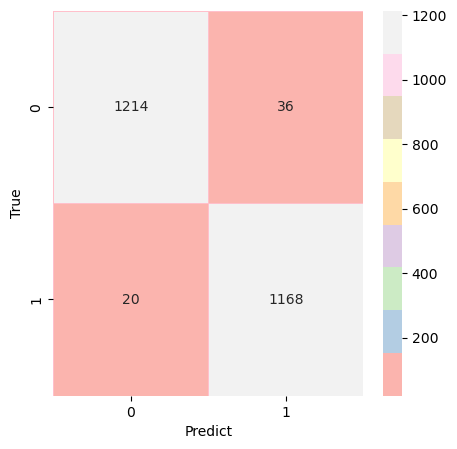

In [276]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_true_lr = y_test
cm = confusion_matrix(y_true_lr, y_pred_lr)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="pink",fmt = ".0f",ax=ax,cmap="Pastel1")
plt.xlabel("Predict")
plt.ylabel("True")
plt.show()

In [277]:
## KNN Classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_preimage,y_train)
print("Test Accuracy: {}%".format(round(knn.score(test_set,y_test)*100,2)))

Test Accuracy: 100.0%


In [278]:
## SVM Classification
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_preimage,y_train)
print("Test Accuracy: {}%".format(round(svm.score(test_set,y_test)*100,2)))

Test Accuracy: 95.94%


In [279]:
## Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_preimage,y_train)
print("Test Accuracy: {}%".format(round(nb.score(test_set,y_test)*100,2)))

Test Accuracy: 93.36%


In [280]:
## Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_preimage,y_train)
print("Test Accuracy: {}%".format(round(dt.score(test_set,y_test)*100,2)))

Test Accuracy: 96.76%


In [281]:
## Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_preimage,y_train)
print("Test Accuracy: {}%".format(round(rf.score(test_set,y_test)*100,2)))

Test Accuracy: 94.63%


In [245]:
from sklearn.decomposition import KernelPCA

transformer = KernelPCA(n_components=2, kernel='rbf') # KPCA降維成 2-dim 向量  
X_transformed = transformer.fit_transform(data_hot) 
X_transformed

array([[ 0.18558688,  0.28887095],
       [-0.20202424,  0.01303586],
       [-0.04316319, -0.04482043],
       ...,
       [-0.16031729,  0.03098992],
       [ 0.17421231,  0.30039082],
       [-0.1495111 , -0.07062835]])

In [ ]:
#Truncated SVD
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

np.random.seed(0)
X_pca = csr_matrix(train_set)
svd = TruncatedSVD(n_components=10, n_iter=2, random_state=42)
svd.fit(X_pca)
result = svd.transform(X_pca)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
# define the model
steps = [('svd', TruncatedSVD(n_components=10)), ('m', LogisticRegression())] #n_components?
model = Pipeline(steps=steps)
# fit the model on the whole dataset
model.fit(X_pca, y_train)

y_pred = model.predict(test_hot)
print(y_pred)

['p' 'p' 'e' ... 'p' 'e' 'p']


In [38]:
y_test.values #testing data ground truth

array(['e', 'p', 'e', ..., 'e', 'p', 'e'], dtype=object)

In [56]:
correct = 0
for i in range(0,len(y_test)):
    if y_pred[i] == y_test.values[i]:
        correct += 1

acc = correct / len(y_test) * 100
print(str(acc)+"%")

100.0%
